In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_excel('processed_file_new.xlsx')

df.head(10)

,category,price,currency,price_1m2,title,address,area,title_deed,repair,room_number,region,region_new
0,kohne,137 000,AZN,2 630 AZN/m²,"Satilir 3 otaqli kohne tikili 52 m², 8-ci kilo...",Elshen Suleymanov kuc 137,52 m²,var,var,3,8-ci kilometr,Nizami
1,yeni,183 000,AZN,1 790 AZN/m²,"Satilir 2 otaqli yeni tikili 102 m², Neftchile...",Mehdi Abbasov kucesi,102 m²,yoxdur,var,2,Neftchiler,Nizami
2,kohne,145 000,AZN,2 230 AZN/m²,"Satilir 2 otaqli kohne tikili 65 m², Nerimanov r.",Ataturk Prospekti,65 m²,var,var,2,Nerimanov,Nerimanov
3,kohne,190 000,AZN,2 000 AZN/m²,"Satilir 3 otaqli kohne tikili 95 m², Genclik m.",Ataturk pr,95 m²,var,var,3,Genclik,Nerimanov
4,yeni,294 000,AZN,1 550 AZN/m²,"Satilir 3 otaqli yeni tikili 190 m², Nesimi r.",Mohsun Senani kucesi,190 m²,var,yoxdur,3,Nesimi,Nerimanov
5,kohne,87 000,AZN,1 930 AZN/m²,"Satilir 1 otaqli kohne tikili 45 m², Nesimi m.",Svetlana Memmedova 210,45 m²,var,var,1,Nesimi,Nerimanov
6,yeni,550 000,AZN,2 530 AZN/m²,"Satilir 5 otaqli yeni tikili 217 m², Neriman N...",Qarabag kuc 55,217 m²,yoxdur,var,5,Neriman Nerimanov,Nerimanov
7,yeni,125 000,AZN,2 160 AZN/m²,"Satilir 2 otaqli yeni tikili 58 m², Yeni Yasam...",Mehemmed Xiyabani kucesi,58 m²,yoxdur,var,2,Yeni Yasamal,Yasamal
8,kohne,150 000,AZN,2 730 AZN/m²,"Satilir 2 otaqli kohne tikili 55 m², Nizami m.",Neriman Nerimanov pr,55 m²,var,var,2,Nizami,Nizami
9,yeni,62 000,AZN,1 510 AZN/m²,"Satilir 2 otaqli yeni tikili 41 m², Masazir q.",İstiqlaliyyet kucesi,41 m²,var,var,2,Masazir,Absheron


In [116]:
df = df.drop(columns=['region', 'address', 'currency', 'title', 'price_1m2', 'category', 'title_deed', 'repair'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35457 entries, 0 to 35456
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        35457 non-null  object
 1   area         35457 non-null  object
 2   room_number  35457 non-null  int64 
 3   region_new   35457 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [117]:
df = df.drop_duplicates()

#df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22535 entries, 0 to 35454
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        22535 non-null  object
 1   area         22535 non-null  object
 2   room_number  22535 non-null  int64 
 3   region_new   22535 non-null  object
dtypes: int64(1), object(3)
memory usage: 880.3+ KB


In [118]:
df['price'] = df['price'].astype(str).str.replace(' ', '').astype(int)
df['area'] = df['area'].astype(str).str.replace('m²', '', regex=False).str.replace(' ', '').str.split('.').str[0].astype(int)

In [119]:
df.head(5)

,price,area,room_number,region_new
0,137000,52,3,Nizami
1,183000,102,2,Nizami
2,145000,65,2,Nerimanov
3,190000,95,3,Nerimanov
4,294000,190,3,Nerimanov


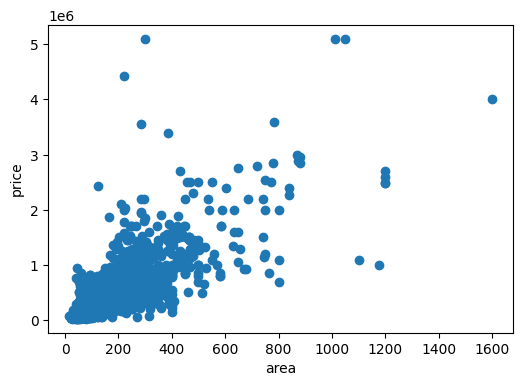

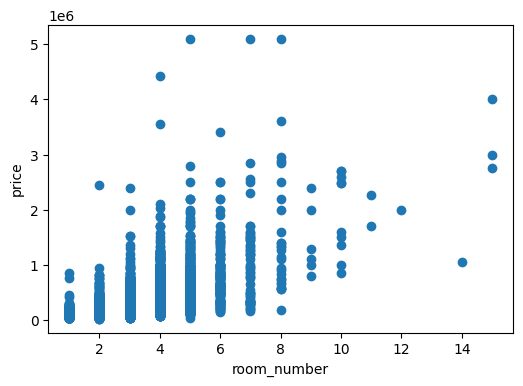

In [120]:
features = ['area', 'room_number']

for col in features:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

In [ ]:
region_df = df[df['region_new'] == 'Nizami']

corr = region_df['room_number'].corr(region_df['price'])
corr

np.float64(0.6879061364187364)

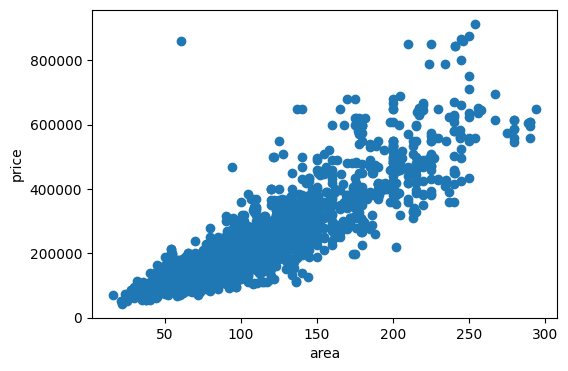

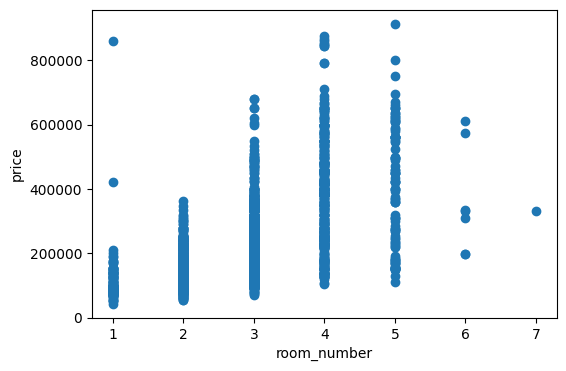

In [122]:
df_clean = region_df[(region_df['price'] < 1000000) & (region_df['room_number'] < 12) & (region_df['area'] < 300)].reset_index(drop=True)
features = ['area', 'room_number']

for col in features:
    plt.figure(figsize=(6,4))
    plt.scatter(df_clean[col], df_clean['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

In [123]:
X = df_clean[['area', 'room_number']]
y = df_clean[['price']]
X.head()

,area,room_number
0,52,3
1,102,2
2,55,2
3,64,2
4,149,3


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,area,room_number
536,137,3
1272,155,3
752,76,3
2173,75,2
1957,125,5
...,...,...
314,210,4
1846,135,5
1477,95,3
1201,280,4


In [125]:
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8134343278794169

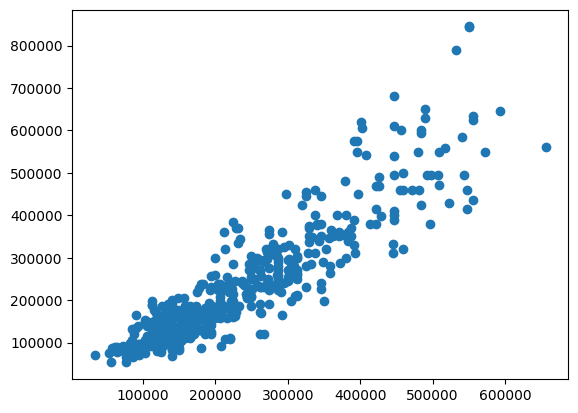

In [126]:
predictions = model.predict(X_test)
plt.scatter(predictions, y_test)